In [1]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape,iris.target.shape

((150, 4), (150,))

**一般的分割方式,训练集-测试集.然而这种方式并不是很好**

In [2]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0) 

clf_svc = svm.SVC(kernel='linear').fit(X_train,y_train)
clf_svc.score(X_test,y_test)

0.9666666666666667

 - 缺点一:浪费数据
 - 缺点二:容易过拟合,且矫正方式不方便
 
这时,我们需要使用另外一种分割方式-交叉验证

In [3]:
from sklearn.model_selection import cross_val_score
clf_svc_cv = svm.SVC(kernel='linear',C=1)
scores_clf_svc_cv = cross_val_score(clf_svc_cv,iris.data,iris.target,cv=5)
print(scores_clf_svc_cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_clf_svc_cv.mean(), scores_clf_svc_cv.std() * 2))

[0.96666667 1.         0.96666667 0.96666667 1.        ]
Accuracy: 0.98 (+/- 0.03)


 **同时我们也可以为cross_val_score选择不同的性能度量函数**

In [4]:
from sklearn import metrics
scores_clf_svc_cv_f1 = cross_val_score(clf_svc_cv,iris.data,iris.target,cv=5,scoring='f1_macro')
print("F1: %0.2f (+/- %0.2f)" % (scores_clf_svc_cv_f1.mean(), scores_clf_svc_cv_f1.std() * 2))

F1: 0.98 (+/- 0.03)


同时也正是这些特性使得,cv与数据转化以及pipline(sklearn中的管道机制)变得更加契合

In [5]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
clf_pipline = make_pipeline(preprocessing.StandardScaler(),svm.SVC(C=1))
scores_pipline_cv = cross_val_score(clf_pipline,iris.data,iris.target,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_clf_svc_cv_f1.mean(), scores_clf_svc_cv_f1.std() * 2))

Accuracy: 0.98 (+/- 0.03)


**同时我们还可以在交叉验证使用多个度量函数**

In [6]:
from sklearn.model_selection import cross_validate
from sklearn import metrics

scoring = ['precision_macro', 'recall_macro']
clf_cvs = svm.SVC(kernel='linear', C=1, random_state=0)
scores_cvs = cross_validate(clf_cvs,iris.data,iris.target,cv=5,scoring=scoring,return_train_score = False)
sorted(scores_cvs.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [7]:
print(scores_cvs['test_recall_macro'])
print("test_recall_macro: %0.2f (+/- %0.2f)" % (scores_cvs['test_recall_macro'].mean(), scores_cvs['test_recall_macro'].std() * 2))

[0.96666667 1.         0.96666667 0.96666667 1.        ]
test_recall_macro: 0.98 (+/- 0.03)


**同时cross_validate也可以使用make_scorer自定义度量功能**
**或者使用单一独量**

In [8]:
from sklearn.metrics.scorer import make_scorer
scoring_new = {'prec_macro': 'precision_macro','recall_micro': make_scorer(metrics.recall_score, average='macro')}
# 注意此处的make_scorer
scores_cvs_new = cross_validate(clf_cvs,iris.data,iris.target,cv=5,scoring=scoring_new,return_train_score = False)
sorted(scores_cvs_new.keys())

/home/fonttian/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


['fit_time', 'score_time', 'test_prec_macro', 'test_recall_micro']

In [9]:
print(scores_cvs_new['test_recall_micro'])
print("test_recall_micro: %0.2f (+/- %0.2f)" % (scores_cvs_new['test_recall_micro'].mean(), scores_cvs_new['test_recall_micro'].std() * 2))

[0.96666667 1.         0.96666667 0.96666667 1.        ]
test_recall_micro: 0.98 (+/- 0.03)


关于Sklearn中的CV还有cross_val_predict可用于预测,下面则是Sklearn中一个关于使用该方法进行可视化预测错误的案例

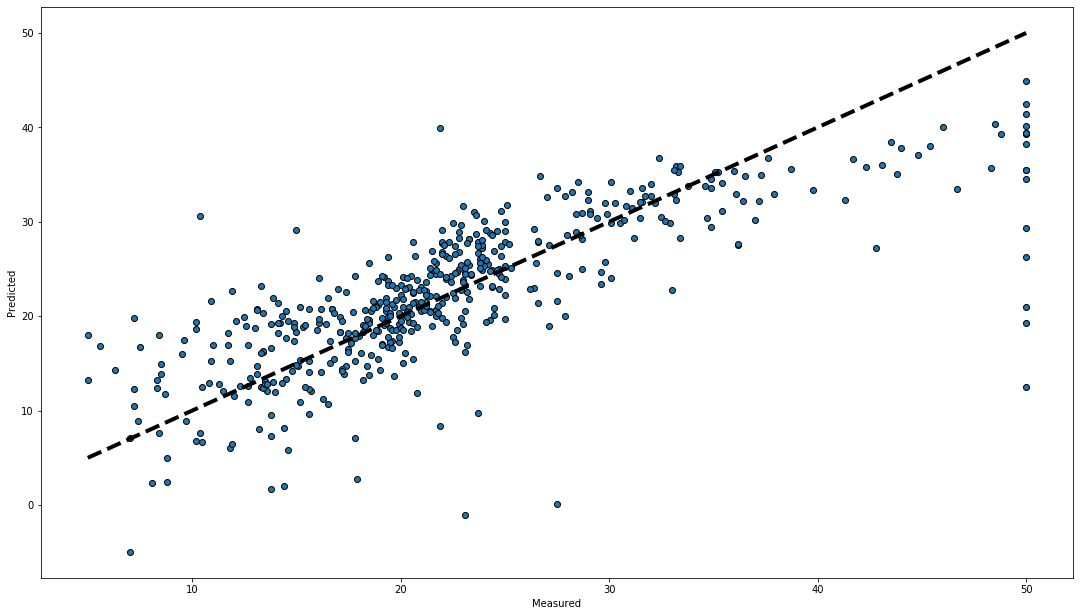

In [10]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5)
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()